## Пример работы программы:

В папке utils лежит файл test.py в котором имеется функция process. Она абсоютно идентична main.py и ее цель исключительно для наглядной демонстрации работы кода в jupiter notebook без использования парсинга аргументов в cli.

In [1]:
from test import process

In [2]:
import mne
import pandas as pd
file = '../Data_VECG/ECG_1.edf'
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names
info

Extracting EDF parameters from c:\МГТУ НАУКА\GITHUB KOLDIM\vector_ECG\Data_VECG\ECG_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Info | 7 non-empty values
 bads: []
 ch_names: ECG I-Ref, ECG II-Ref, ECG III-Ref, ECG AVR-Ref, ECG AVL-Ref, ...
 chs: 12 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2023-05-24 17:38:57 UTC
 nchan: 12
 projs: []
 sfreq: 250.0 Hz
>

In [3]:
def rename_columns(df):
    # Приводит к правильному виду данные в df:
    new_columns = []
    for column in df.columns:
        new_columns.append(column[:-4])
    df.columns = new_columns
    return df

fd = info['sfreq'] # Частота дискретизации
df = pd.DataFrame(data=raw_data.T,    # values
            index=range(raw_data.shape[1]),  # 1st column as index
            columns=channels)  # 1st row as the column names
if 'ECG I-Ref' in df.columns:
    df = rename_columns(df)
    channels = df.columns
df

,ECG I,ECG II,ECG III,ECG AVR,ECG AVL,ECG AVF,ECG V1,ECG V2,ECG V3,ECG V4,ECG V5,ECG V6
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00001,0.00001,0.00000,-0.00001,0.00000,0.00001,-0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001
2,0.00002,0.00001,-0.00001,-0.00001,0.00001,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,-0.00001
3,0.00000,-0.00002,-0.00002,0.00001,0.00001,-0.00002,0.00000,0.00006,0.00000,0.00001,0.00000,0.00000
4,0.00000,-0.00002,-0.00002,0.00001,0.00001,-0.00002,0.00000,0.00007,-0.00001,-0.00001,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-0.00022,0.00034,0.00056,-0.00006,-0.00039,0.00045,-0.00054,0.00019,-0.00011,0.00012,-0.00003,-0.00001
7496,-0.00023,0.00034,0.00057,-0.00005,-0.00040,0.00045,-0.00054,0.00019,-0.00010,0.00012,-0.00003,0.00000
7497,-0.00023,0.00034,0.00057,-0.00005,-0.00040,0.00045,-0.00055,0.00019,-0.00011,0.00012,-0.00003,0.00000
7498,-0.00022,0.00036,0.00058,-0.00007,-0.00040,0.00047,-0.00056,0.00017,-0.00012,0.00010,-0.00004,-0.00001


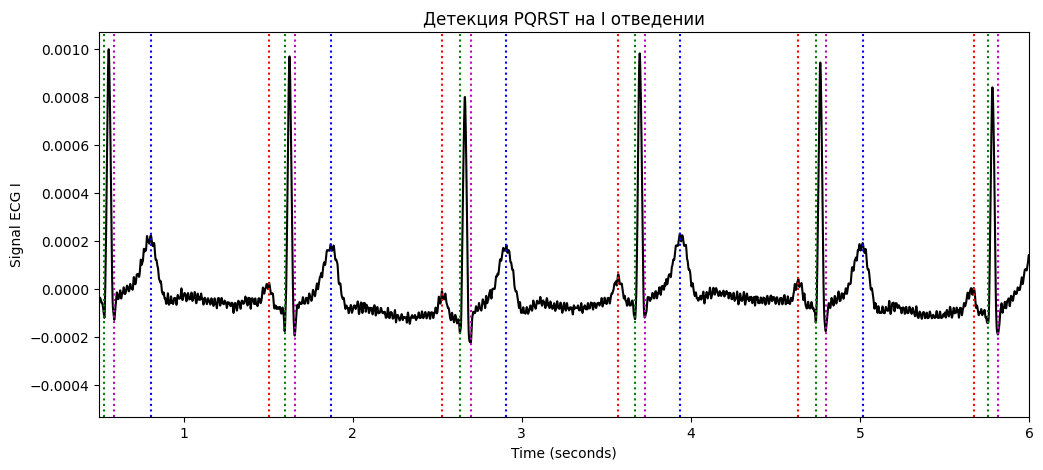

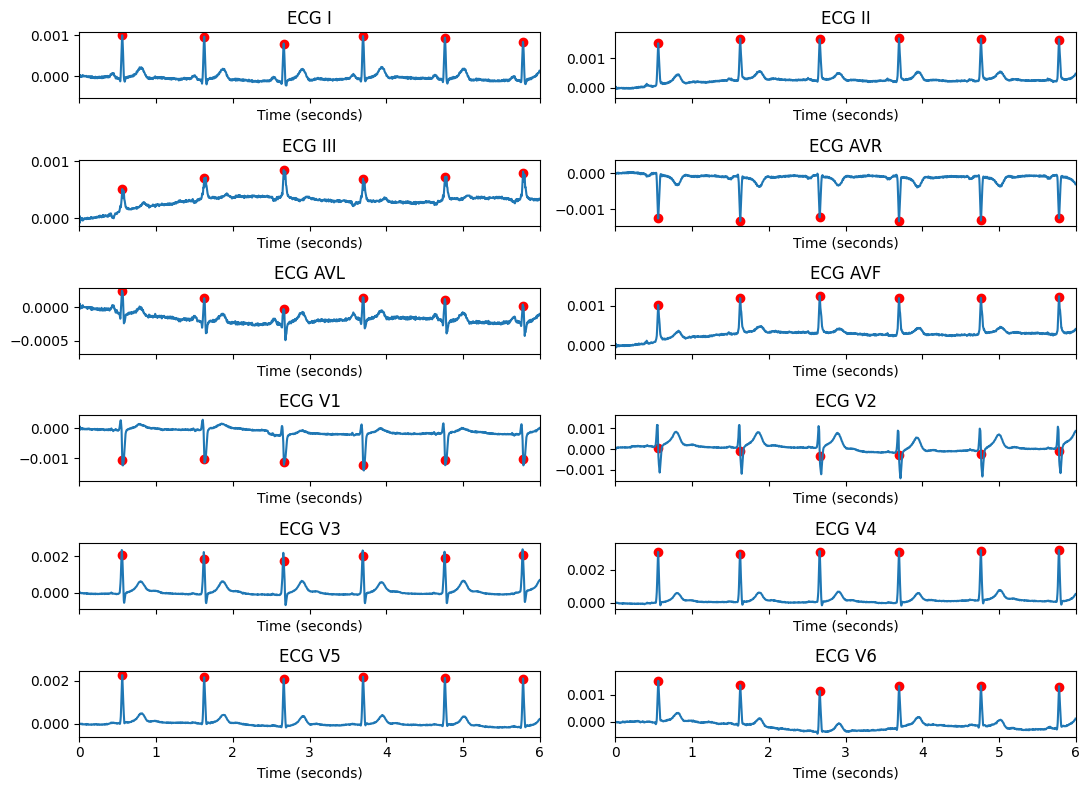

Запрошен диапазон с 3 по 6 период включительно


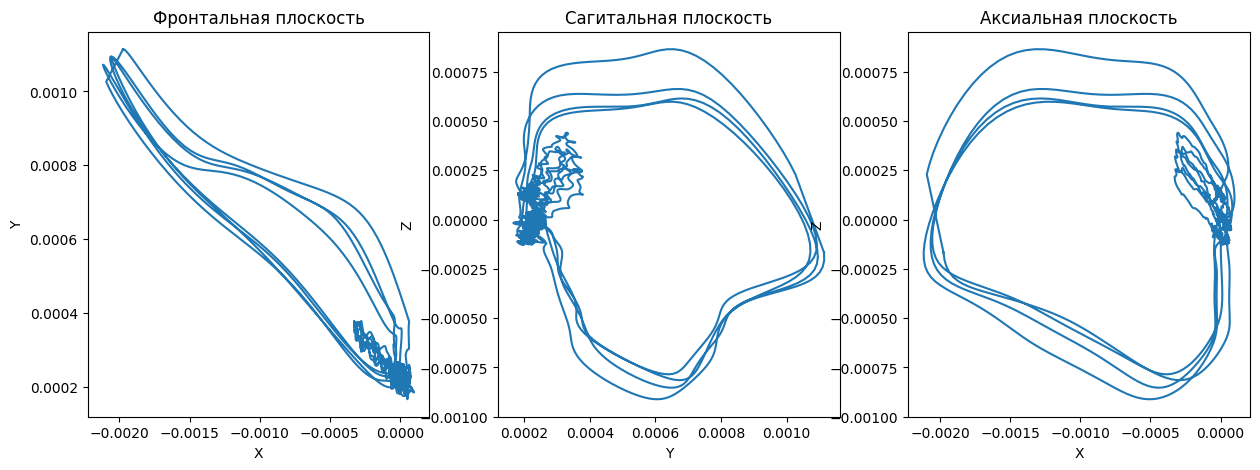

In [4]:
input ={}
input["data_edf"] = '../Data_VECG/ECG_1.edf'
input["n_term_start"] = 3
input["n_term_finish"] = 6
input["filt"] = False
input["f_sreza"] = None
input["f_sampling"] = 2000
input["show_detected_pqrst"] = True
input["show_ecg"] = True
input["plot_3d"] = True
input["save_images"] = False
input["show_log_scaling"] = False
input["cancel_showing"] = False
input["qrs_loop_area"] = False
input["t_loop_area"] = False
input["show_log_loop_area"] = False
input["count_qrst_angle"] = False
input["show_log_qrst_angle"] = False
res = process(input)

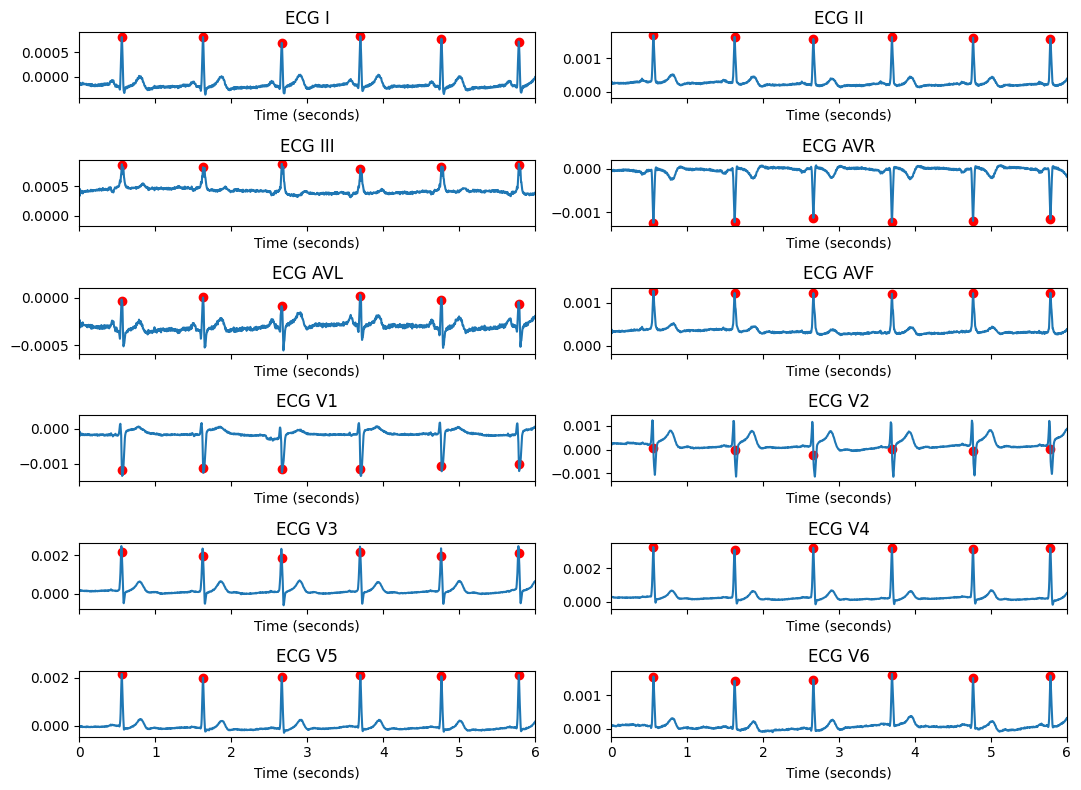

Запрошен диапазон с 3 по 6 период включительно


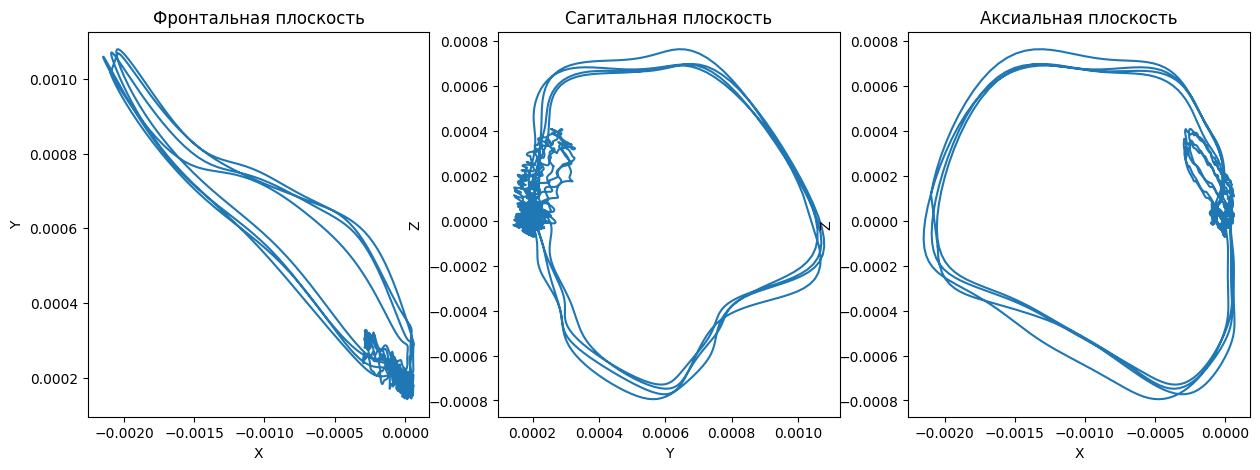

In [5]:
input ={}
input["data_edf"] = '../Data_VECG/ECG_1.edf'
input["n_term_start"] = 3
input["n_term_finish"] = 6
input["filt"] = True
input["f_sreza"] = 0.5
input["f_sampling"] = 2000
input["show_detected_pqrst"] = False
input["show_ecg"] = True
input["plot_3d"] = True
input["save_images"] = False
input["show_log_scaling"] = False
input["cancel_showing"] = False
input["qrs_loop_area"] = False
input["t_loop_area"] = False
input["show_log_loop_area"] = False
input["count_qrst_angle"] = False
input["show_log_qrst_angle"] = False
res = process(input)

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


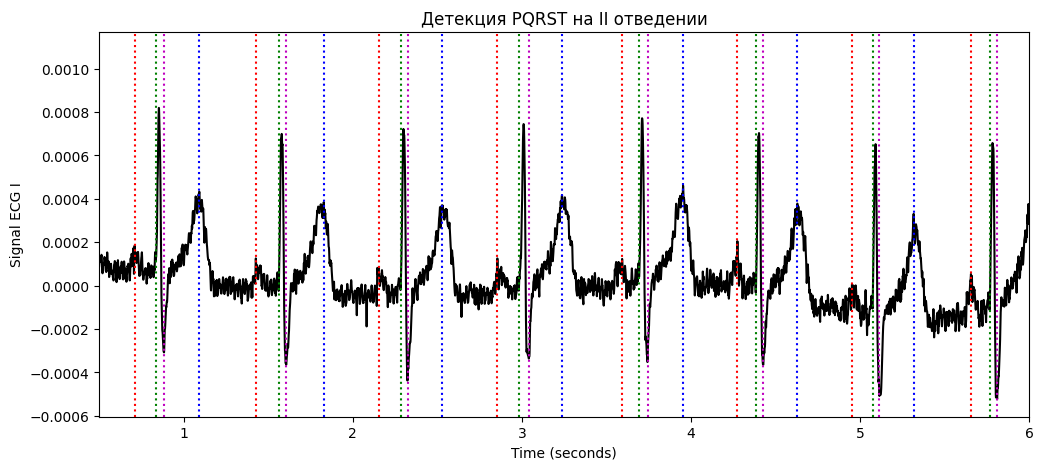

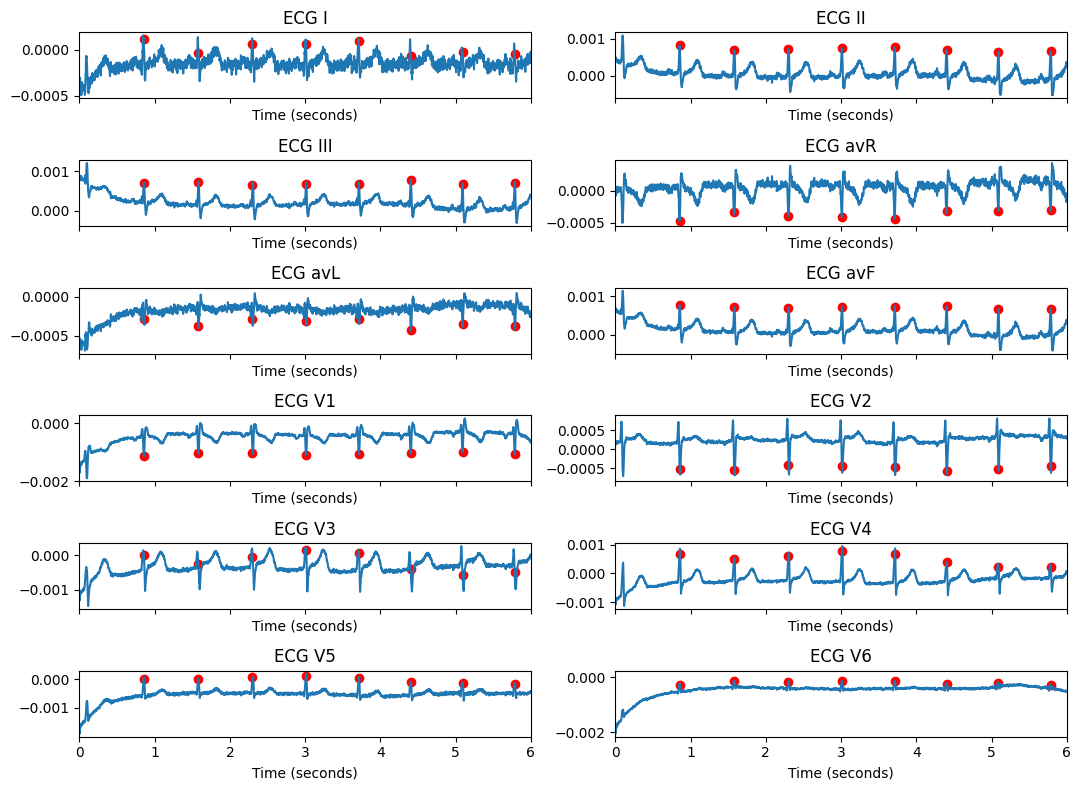

Запрошен диапазон с 3 по 3 период включительно


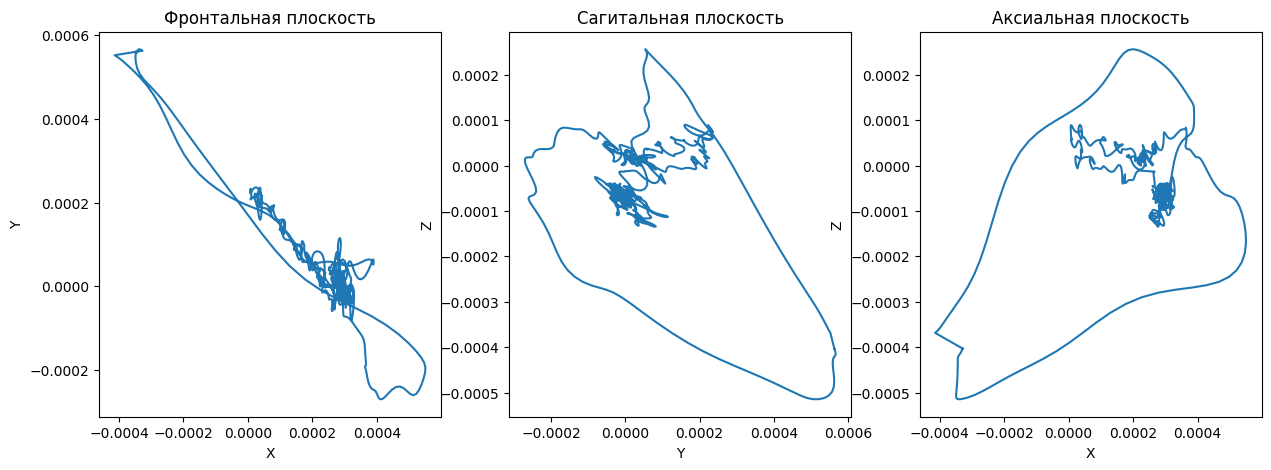

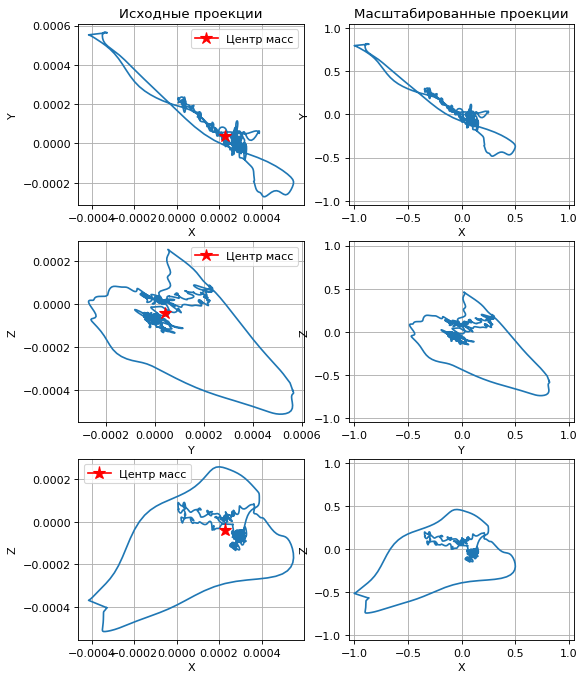

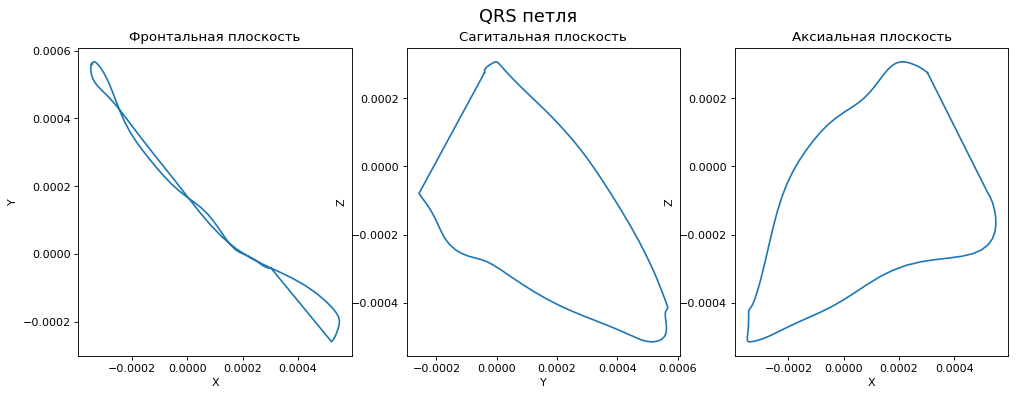

Площадь петли QRS во фронтальной плоскости: 1.4490849158424568e-08
Площадь петли QRS в сагитальной плоскости: 3.388978520463314e-07
Площадь петли QRS в аксиальной плоскости: 3.9513988394887667e-07


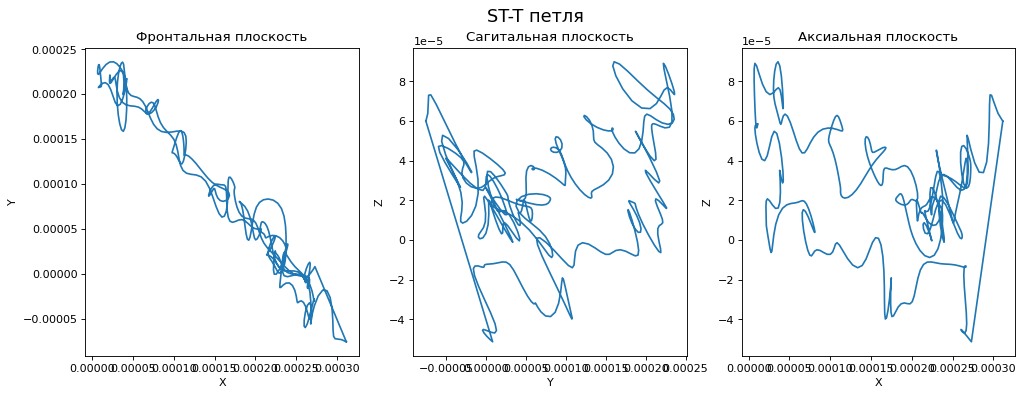

Площадь петли ST-T во фронтальной плоскости: 6.232870286171075e-09
Площадь петли ST-T в сагитальной плоскости: 1.1668276947840126e-08
Площадь петли ST-T в аксиальной плоскости: 1.1950799045341443e-08
Угол QRST равен 74.79 градусов
Угол QRST во фронтальной плоскости равен 63.9 градусов


In [6]:
input ={}
input["data_edf"] = 'C:/Users/Дмитрий/Downloads/НД-ЭКГ-1.0 от 140323/НД-ЭКГ-1.0 от 140323/1090205.edf'
input["n_term_start"] = 3
input["n_term_finish"] = 3
input["filt"] = True
input["f_sreza"] = 0.5
input["f_sampling"] = 2000
input["show_detected_pqrst"] = True
input["show_ecg"] = True
input["plot_3d"] = True
input["save_images"] = False
input["show_log_scaling"] = True
input["cancel_showing"] = False
input["qrs_loop_area"] = True
input["t_loop_area"] = True
input["show_log_loop_area"] = True
input["count_qrst_angle"] = True
input["show_log_qrst_angle"] = True
res = process(input)

In [7]:
res

([1.4490849158424568e-08,
  3.388978520463314e-07,
  3.9513988394887667e-07,
  6.232870286171075e-09,
  1.1668276947840126e-08,
  1.1950799045341443e-08],
 74.79467443676927,
 63.8951392141822)

In [8]:
input ={}
input["data_edf"] = '../Data_VECG/ECG_4.edf'
input["n_term_start"] = 4
input["n_term_finish"] = None
input["filt"] = True
input["f_sreza"] = 0.5
input["f_sampling"] = 2000
input["show_detected_pqrst"] = True
input["show_ecg"] = True
input["plot_3d"] = True
input["save_images"] = False
input["show_log_scaling"] = True
input["cancel_showing"] = True
input["qrs_loop_area"] = True
input["t_loop_area"] = True
input["show_log_loop_area"] = True
input["count_qrst_angle"] = True
input["show_log_qrst_angle"] = True
res = process(input)

Запрошен 4 период
Площадь петли QRS во фронтальной плоскости: 1.4330556315181585e-08
Площадь петли QRS в сагитальной плоскости: 5.2261153088366824e-08
Площадь петли QRS в аксиальной плоскости: 8.065005482810238e-08
Площадь петли ST-T во фронтальной плоскости: 1.4152087452292595e-09
Площадь петли ST-T в сагитальной плоскости: 1.7913801697281622e-08
Площадь петли ST-T в аксиальной плоскости: 1.107283999326053e-09
Угол QRST равен 35.84 градусов
Угол QRST во фронтальной плоскости равен 35.87 градусов
